In [ ]:
# decay heatmap 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [ ]:
## 1. Supp_Figure_9b_9c ---

In [2]:
### A.  validation lists

dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
pure = pd.read_csv(dir+'vivo_pure_allinfo.txt', sep='\t')
pure[['tid','gid']] = pure['gene'].str.split('::',1,expand = True)
validation_list = ['RPS19A', 'RPS21','orf19.6264.4','RPL3','RPL29','RPL42','TDH3','RPS25B','orf19.6882.1','orf19.3264.1','RPS3','RPL15A','TEF1','TAL1','RPL23A','RPL14','PET9']
print(len(validation_list))

flt = pure[pure['gid'].isin(validation_list)]
print(len(flt.gene.unique()))
valid_list = list(flt.gene.unique())
valid_list


### B. to get the input expression data 
### stepminer 30C ---------

dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
df_final = pd.read_csv(dir+'stepminer_30C_FPKM_log_same_column.pcl',sep='\t')
stepminer_input = df_final.loc[:,['tid_pos', 'name', 'gweight', 'Control', 'Control.1', '20min','20min.1', '40min', '40min.1', 
                                  '60min', '60min.1', '120min','120min.1']].set_index(["name"])

dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
stepminer = pd.read_table(dir+'stepminer_30C_FPKM_log_same_column_1step.ann')
stepminer = stepminer.loc[:,["Name","num","numSteps","geneIndex","pvalue","sstot","sse","label","step0","step1","mean0","mean1","mean2"]].set_index(["Name"])
stepminer = stepminer.merge(stepminer_input,left_index=True,right_index=True)


stepminer_flt = stepminer.loc[stepminer["label"] ==2]
stepminer_flt['step0'] = stepminer_flt['step0'].astype(int)
stepminer_flt = stepminer_flt.sort_values(by=['label','step0'])
stepminer_flt['group'] = stepminer_flt['label'].astype(str) + ':'+ stepminer_flt['step0'].astype(str)
stepminer_30 = stepminer_flt
print(stepminer_30.shape)

### stepminer 37C ---------

dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
df_final = pd.read_csv(dir+'stepminer_37C_FPKM_log_same_column.pcl',sep='\t')
stepminer_input = df_final.loc[:,['tid_pos', 'name', 'gweight', 'Control', 'Control.1', '20min','20min.1', '40min', '40min.1', 
                                  '60min', '60min.1', '120min','120min.1']].set_index(["name"])


dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
stepminer = pd.read_table(dir+'stepminer_37C_FPKM_log_same_column_1step.ann')
stepminer = stepminer.loc[:,["Name","num","numSteps","geneIndex","pvalue","sstot","sse","label","step0","step1","mean0","mean1","mean2"]].set_index(["Name"])
stepminer = stepminer.merge(stepminer_input,left_index=True,right_index=True)

stepminer_flt = stepminer.loc[stepminer["label"] ==2]
stepminer_flt['step0'] = stepminer_flt['step0'].astype(int)
stepminer_flt = stepminer_flt.sort_values(by=['label','step0'])
stepminer_flt['group'] = stepminer_flt['label'].astype(str) + ':'+ stepminer_flt['step0'].astype(str)
stepminer_37 = stepminer_flt
print(stepminer_37.shape)

gene_list = list(set(list(stepminer_30.index)) | set(list(stepminer_37.index)))
print(len(gene_list))

17
17
(451, 25)
(1023, 25)
1136


/tmp/ipykernel_14528/3483185640.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  pure[['tid','gid']] = pure['gene'].str.split('::',1,expand = True)
/tmp/ipykernel_14528/3483185640.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stepminer_flt['step0'] = stepminer_flt['step0'].astype(int)
/tmp/ipykernel_14528/3483185640.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stepminer_flt['step0'] = stepminer_flt['s

label
0    3138
1    2313
2     451
dtype: int64


/apps/users/hanjian/miniconda3/envs/gis/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


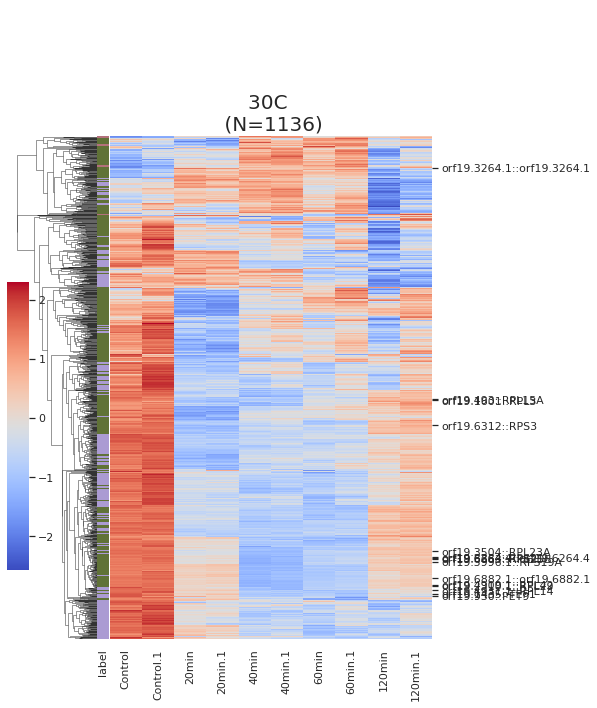

In [3]:
### 30C ---------------------------

dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
df_final = pd.read_csv(dir+'stepminer_30C_FPKM_log_same_column.pcl',sep='\t')
stepminer_input = df_final.loc[:,['tid_pos', 'name', 'gweight', 'Control', 'Control.1', '20min','20min.1', '40min', '40min.1', 
                                  '60min', '60min.1', '120min','120min.1']].set_index(["name"])


dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
stepminer = pd.read_table(dir+'stepminer_30C_FPKM_log_same_column_1step.ann')
stepminer = stepminer.loc[:,["Name","num","numSteps","geneIndex","pvalue","sstot","sse","label","step0","step1","mean0","mean1","mean2"]].set_index(["Name"])
stepminer = stepminer.merge(stepminer_input,left_index=True,right_index=True)
stepminer_flt = stepminer[stepminer.index.isin(gene_list)]
dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
stepminer_flt.to_csv(dir_out+'stepminer_30C_decay_structure_changed_genes_union.txt',sep='\t') 

### plots the heatmap 
color_dict = dict(zip([0,1,2,3,4], sns.cubehelix_palette(5,light=.9, dark=.4, reverse=True, start=4, rot=-2)))
# get the values of the "group" col in index, map to its color legend, convert back to frame and change to the same index as the interval df
color_col = stepminer_flt["label"].map(color_dict).to_frame()
color_col

print(stepminer.value_counts("label"))
sns.set(font_scale=1)
g=sns.clustermap(stepminer_flt.loc[:,['Control', 'Control.1', '20min','20min.1', '40min', '40min.1', 
                                  '60min', '60min.1', '120min','120min.1']], cmap="coolwarm", row_cluster=True,col_cluster=False, z_score=0,row_colors=color_col, yticklabels=True) # ,figsize=(8,8)
inputdata = stepminer_flt.loc[:,['Control', 'Control.1', '20min','20min.1', '40min', '40min.1', '60min', '60min.1', '120min','120min.1']]

### to label specific transcripts for row -------------------------
### to label specific transcripts for row -------------------------

common = list(set(inputdata.index) & set(valid_list))
reordered_labels = inputdata.index[g.dendrogram_row.reordered_ind].tolist()
reordered = inputdata.index[g.dendrogram_row.reordered_ind]
reordered = pd.DataFrame(reordered)
dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
reordered.to_csv(dir_out + '30C_decay_heatmap_label_order_union.txt',sep='\t')

try:
    use_ticks = [reordered_labels.index(label) + .5 for label in common]
except Exception:
    pass 

g.ax_heatmap.set(yticks=use_ticks, yticklabels=common)

### to label specific transcripts for row -------------------------
### to label specific transcripts for row -------------------------


g.fig.subplots_adjust(right=0.6)
g.ax_cbar.set_position((0.01, .2, .03, .4))
g.ax_heatmap.set_title("30C \n (N=1136)",fontsize=20)


dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
plt.savefig(dir_out+'Supp_Figure_9b_30C_decay_heatmap_label_validation_union.pdf', bbox_inches='tight', dpi=300) 

label
1    2498
0    2366
2    1023
dtype: int64


/apps/users/hanjian/miniconda3/envs/gis/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


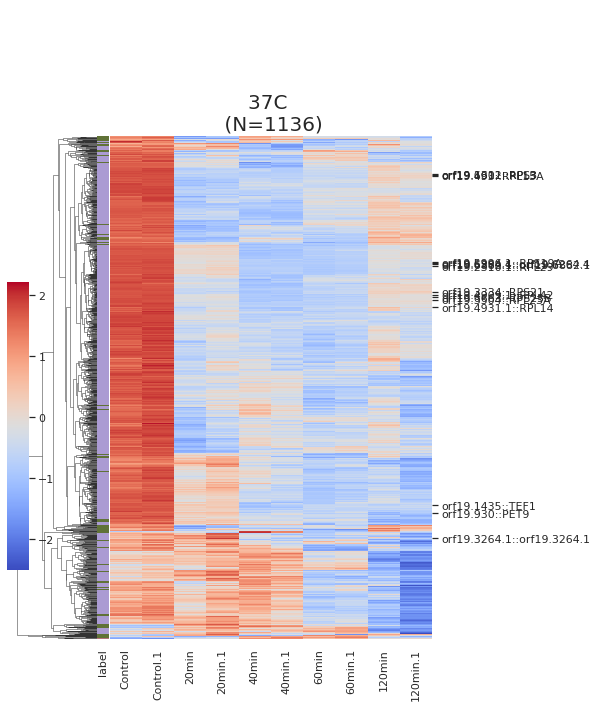

In [4]:
### 37C ---------------------------

dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
df_final = pd.read_csv(dir+'stepminer_37C_FPKM_log_same_column.pcl',sep='\t')
stepminer_input = df_final.loc[:,['tid_pos', 'name', 'gweight', 'Control', 'Control.1', '20min','20min.1', '40min', '40min.1', 
                                  '60min', '60min.1', '120min','120min.1']].set_index(["name"])

dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
stepminer = pd.read_table(dir+'stepminer_37C_FPKM_log_same_column_1step.ann')
stepminer = stepminer.loc[:,["Name","num","numSteps","geneIndex","pvalue","sstot","sse","label","step0","step1","mean0","mean1","mean2"]].set_index(["Name"])
stepminer = stepminer.merge(stepminer_input,left_index=True,right_index=True)
stepminer_flt = stepminer[stepminer.index.isin(gene_list)]
dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
stepminer_flt.to_csv(dir_out+'stepminer_37C_decay_structure_changed_genes_union.txt',sep='\t') 

### plots the heatmap 
color_dict = dict(zip([0,1,2,3,4], sns.cubehelix_palette(5,light=.9, dark=.4, reverse=True, start=4, rot=-2)))
# get the values of the "group" col in index, map to its color legend, convert back to frame and change to the same index as the interval df
color_col = stepminer_flt["label"].map(color_dict).to_frame()
color_col

print(stepminer.value_counts("label"))
sns.set(font_scale=1)
g=sns.clustermap(stepminer_flt.loc[:,['Control', 'Control.1', '20min','20min.1', '40min', '40min.1', 
                                  '60min', '60min.1', '120min','120min.1']], cmap="coolwarm", row_cluster=True,col_cluster=False, z_score=0,row_colors=color_col, yticklabels=True) # ,figsize=(8,8)
inputdata = stepminer_flt.loc[:,['Control', 'Control.1', '20min','20min.1', '40min', '40min.1', '60min', '60min.1', '120min','120min.1']]

### to label specific transcripts for row -------------------------
### to label specific transcripts for row -------------------------

common = list(set(inputdata.index) & set(valid_list))
reordered_labels = inputdata.index[g.dendrogram_row.reordered_ind].tolist()
reordered = inputdata.index[g.dendrogram_row.reordered_ind]
reordered = pd.DataFrame(reordered)
dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
reordered.to_csv(dir_out + '37C_decay_heatmap_label_order_union.txt',sep='\t')

try:
    use_ticks = [reordered_labels.index(label) + .5 for label in common]
except Exception:
    pass 

g.ax_heatmap.set(yticks=use_ticks, yticklabels=common)

### to label specific transcripts for row -------------------------
### to label specific transcripts for row -------------------------

g.fig.subplots_adjust(right=0.6)
g.ax_cbar.set_position((0.01, .2, .03, .4))
g.ax_heatmap.set_title("37C \n (N=1136)",fontsize=20)

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig9/Data/'
plt.savefig(dir_out+'Supp_Figure_9c_37C_decay_heatmap_label_validation_union.pdf', bbox_inches='tight', dpi=300) 